### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
import tensorflow as tf
tf.set_random_seed(42)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD 
from keras import utils 

Using TensorFlow backend.


In [4]:
tf.__version__

'1.13.1'

### Collect Data

In [5]:
import keras

In [6]:
batch_size = 100 
n_inputs = 784 
n_classes = 10 
n_epochs = 10 

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
print(y_test[0:5])

[9 2 1 1 6]


##### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [11]:
y_train = to_categorical( y_train, n_classes) 
y_test = to_categorical( y_test, n_classes)

In [42]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
print(y_train.shape)
print('First 5 examples now are: ', y_train[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

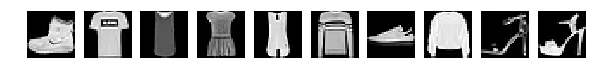

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


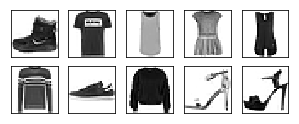

In [13]:
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()

In [14]:
x_train = x_train.reshape( 60000, n_inputs) 
x_test = x_test.reshape( 10000, n_inputs) 

In [15]:
# convert the input values to float32 
x_train = x_train.astype( np.float32) 
x_test = x_test.astype( np.float32) 


In [16]:
x_train /= 255 
x_test /= 255 


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
# build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 





Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________

### Execute the model using model.fit()

In [18]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 2.2755 - acc: 0.1522
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 2.1153 - acc: 0.2790
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.8587 - acc: 0.3942
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.5888 - acc: 0.4713
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.3935 - acc: 0.5299
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.2557 - acc: 0.5713
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.1534 - acc: 0.6020
Epoch 8/10
60000/60000 [==============================] - 3s 46us/step - loss: 1.0757 - acc: 0.6239
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.0098 - acc: 0.6421
Epoch 10/10
60000/60000 [===========================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [25]:
from keras.layers.normalization import BatchNormalization

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add(BatchNormalization())
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 118,794
Trainable params: 118,538
Non-trainable params: 256
_________________________________________________________________


### Execute the model

In [19]:
# evaluate the model and print the accuracy score
scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 0s 39us/step
\ n loss: 0.8987344421386719
\ n accuracy: 0.6934


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [23]:
# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(lr=0.001), metrics =['accuracy']) 

In [24]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 
# evaluate the model and print the accuracy score
scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

Epoch 1/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.9873 - acc: 0.6437
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.9806 - acc: 0.6498
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.9770 - acc: 0.6493
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.9740 - acc: 0.6480
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.9673 - acc: 0.6524
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.9653 - acc: 0.6510
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.9603 - acc: 0.6526
Epoch 8/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.9549 - acc: 0.6579
Epoch 9/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.9526 - acc: 0.6547
Epoch 10/10
10000/10000 [==============================] - 0s 28us/step
\ n loss: 0.9082774684906005

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [20]:
model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 100, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 100, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 


# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

In [21]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 
 

Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 2.2787 - acc: 0.1489
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 2.1219 - acc: 0.2702
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.8736 - acc: 0.3696
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.6323 - acc: 0.4447
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.4537 - acc: 0.5030
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.3181 - acc: 0.5470
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.2161 - acc: 0.5779
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.1357 - acc: 0.6025
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.0711 - acc: 0.6198
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.0138 - acc: 0.6396

## Review model

In [60]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Run the model

In [22]:
# evaluate the model and print the accuracy score
scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 0s 39us/step
\ n loss: 0.9517047709465026
\ n accuracy: 0.6812
